In [217]:
# Importing the libraries
import os
import warnings
import joblib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

*<h3>This is a dataset taken from Kaggle's Heart Failure prediction.</h3>*
**<h5>This dataset was created by combining different datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes.</h5>**
This is the link to the dataset [Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction).<br>
This notebook is inspired from [Kaggle Notebook](https://www.kaggle.com/code/tanmay111999/heart-failure-prediction-cv-score-90-5-models/notebook), a gold medal notebook on Kaggle.

![Image](https://storage.googleapis.com/kaggle-datasets-images/1582403/2603715/fc66626bcce9dec0f401f3f69c2ab2d1/dataset-cover.jpg?t=2021-09-10-18-13-42)


In [218]:
os.chdir('C:/Users/Deepu/AI and Python/This-Ease')
df=pd.read_csv('data/heart.csv')
columns = df.columns
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [219]:
df.shape

(918, 12)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<Axes: >

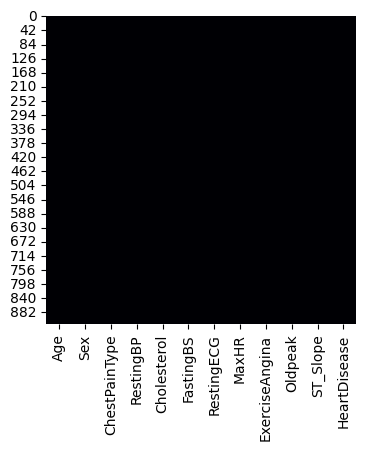

In [221]:
plt.figure(figsize=(4,4))
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)

- *No Null values*

- *Mean values of all the features for cases of heart diseases and non-heart diseases.*

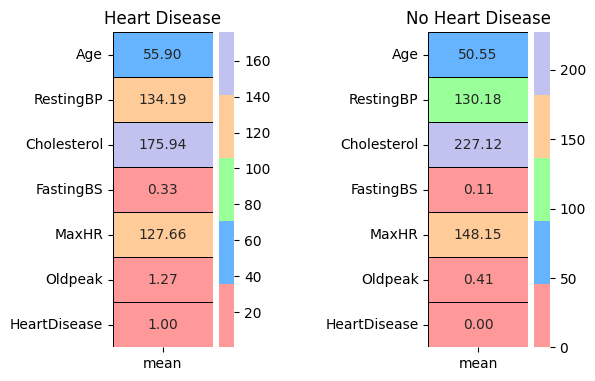

In [222]:
yes = df[df['HeartDisease'] == 1].describe().T
no = df[df['HeartDisease'] == 0].describe().T
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

fig, ax = plt.subplots(1, 2, figsize=(7, 5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.7,linecolor = 'black',fmt = '.2f',)
plt.title('Heart Disease');
plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.7,linecolor = 'black',fmt = '.2f',)
plt.title('No Heart Disease');
fig.tight_layout(pad = 5)

In [223]:
X=df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [224]:
categorical_features = []
numerical_features = []
for i in columns:
    if len(df[i].unique()) > 5:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


In [225]:
# Importing all the models and sklearn stuff
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, \
    RocCurveDisplay, roc_auc_score, classification_report, accuracy_score, precision_recall_curve
from sklearn.feature_selection import SelectKBest, chi2


In [226]:
le = LabelEncoder()
df1 = df.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

- *Creating a deep copy of the orginal dataset and label encoding the text data of the categorical features.*
- *Modifications in the original dataset will not be highlighted in this deep copy.*
- *Hence, we use this deep copy of dataset that has all the features converted into numerical values for visualization & modeling purposes.*

- **Categorical Features**<br>
*Distribution of categorical features*

Text(0.5, 1.0, 'Distribution : HeartDisease')

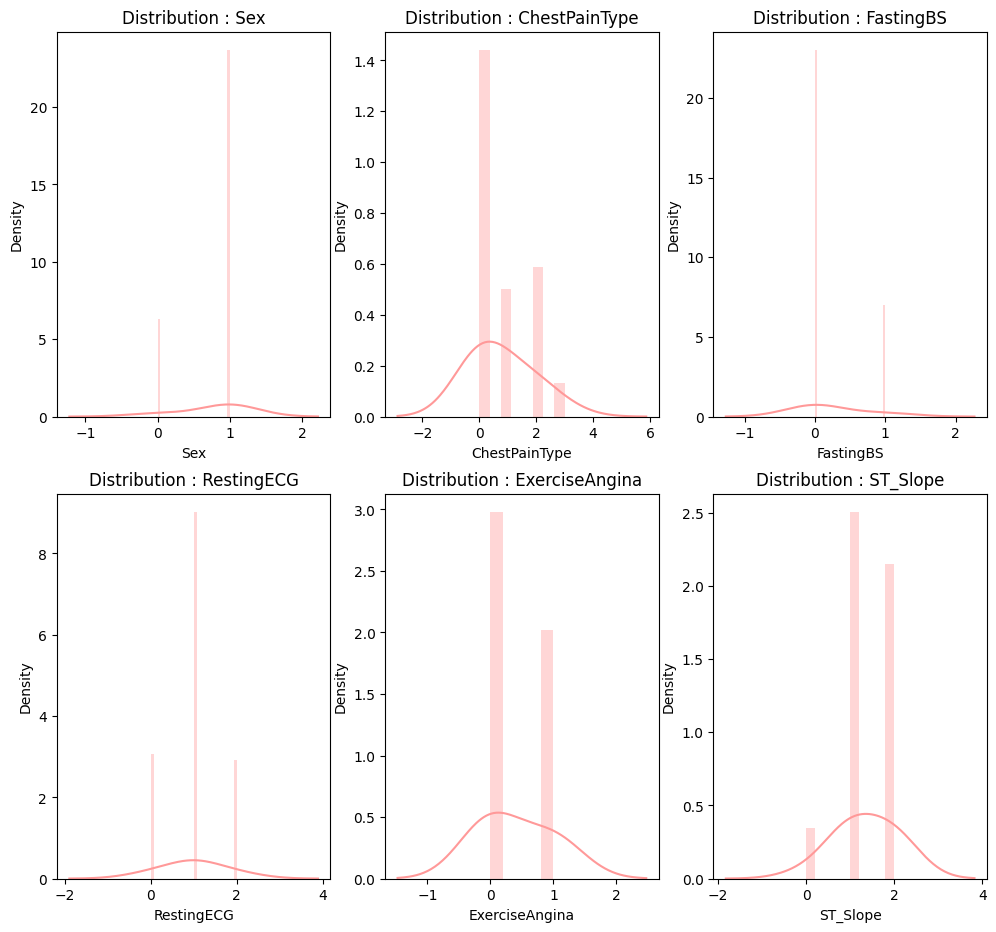

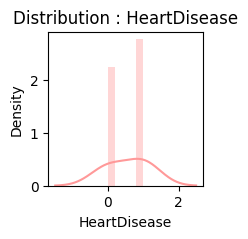

In [227]:
fig, ax = plt.subplots(nrows = 2,ncols = 3,figsize = (12,11))
for i in range(len(categorical_features)-1):
    plt.subplot(2,3,i+1)
    sns.distplot(df1[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
plt.figure(figsize = (2,2))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title)

- **Here the categorical features are mostly normally distributed, hence no issues with these columns.**

- **Numerical Features**<br>
*Distribution of numerical features*

Text(0.5, 1.0, 'Distribution : Oldpeak')

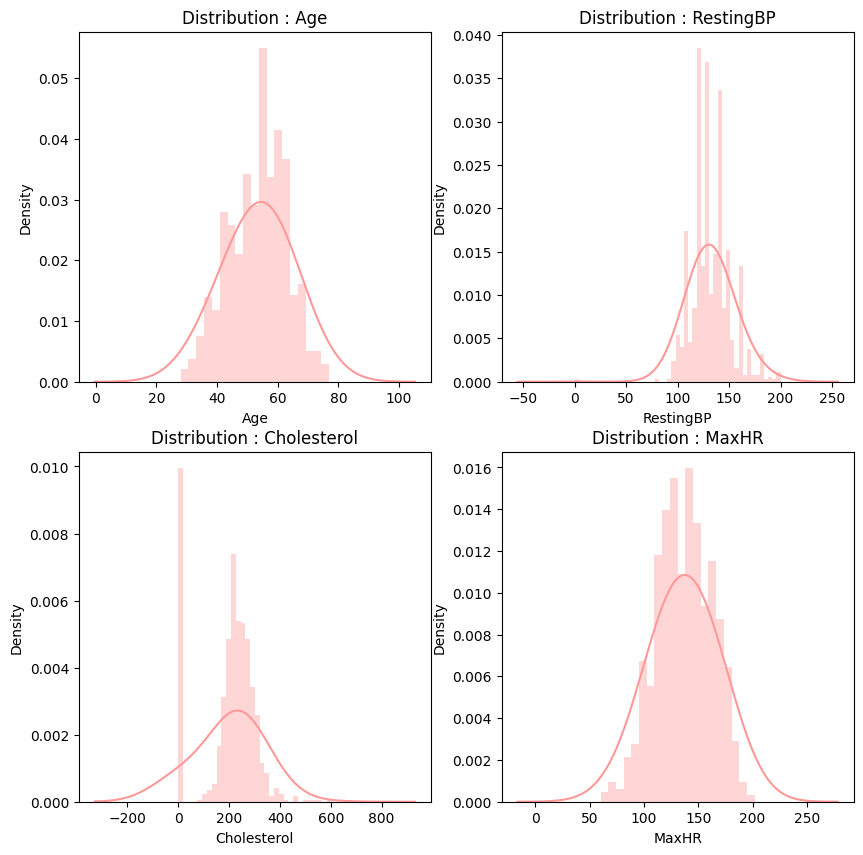

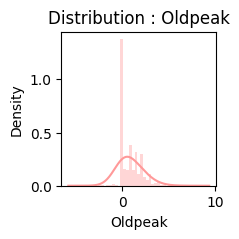

In [228]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,10))
for i in range(len(numerical_features)-1):
    plt.subplot(2,2,i+1)
    sns.distplot(df1[numerical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
    
plt.figure(figsize = (2,2))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title)

- **Oldpeak's data distribution is rightly skewed.**
- **Cholestrol has a bidmodal data distribution.**

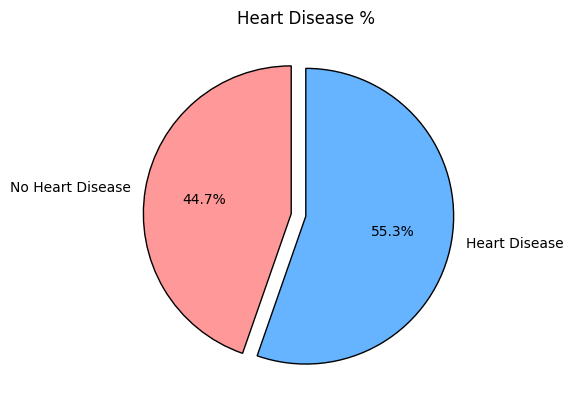

In [229]:
l = list(df['HeartDisease'].value_counts())
circle = [l[1]/sum(l) *100 ,l[0]/sum(l) *100]


plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

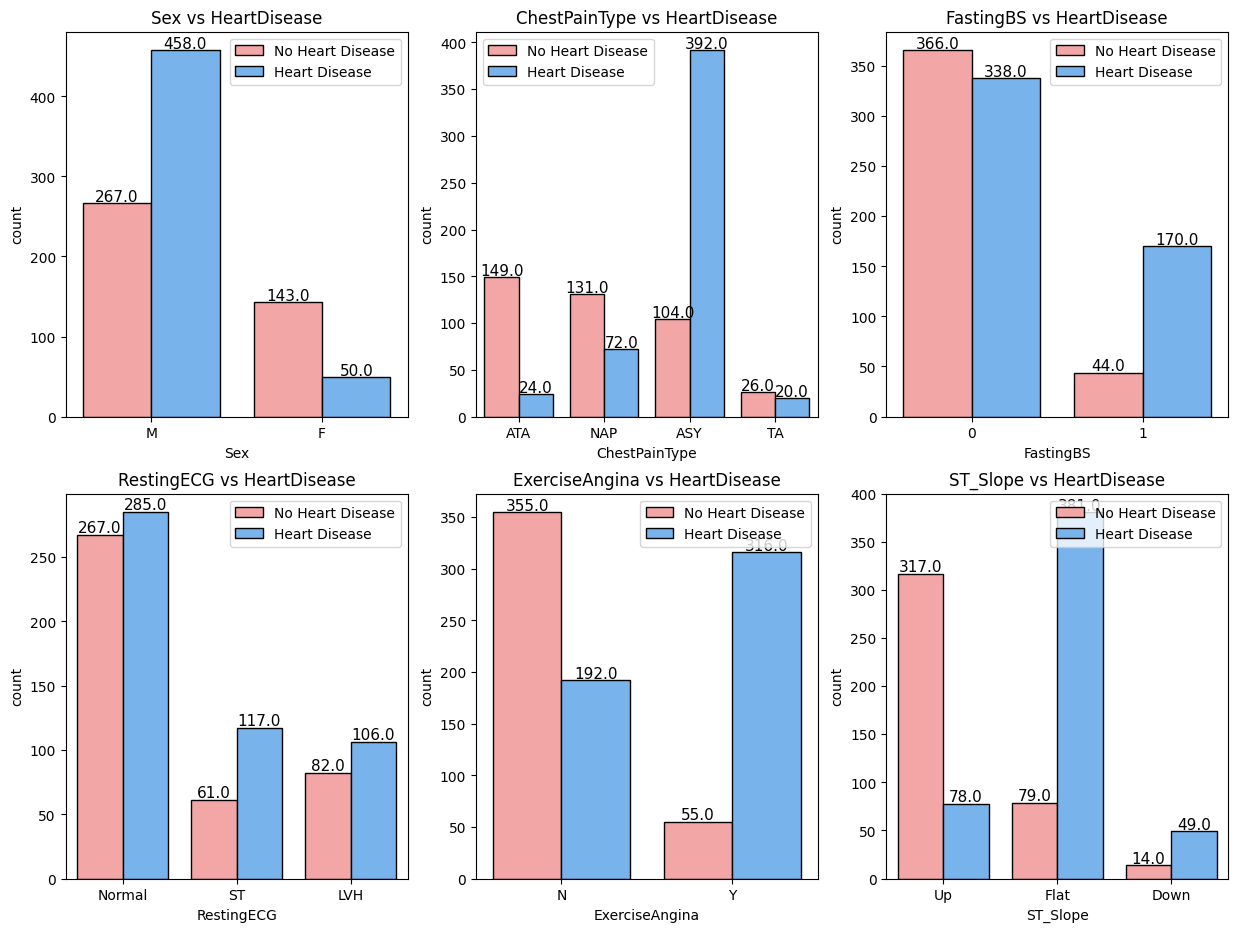

In [230]:
fig, ax = plt.subplots(nrows = 2,ncols = 3,figsize = (15,11))
for i in range(len(categorical_features) - 1):
    plt.subplot(2,3,i+1)
    ax = sns.countplot(data= df, x= categorical_features[i],hue = "HeartDisease",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

- *Male population has more heart disease patients than no heart disease patients. In the case of Female population, heart disease patients are less than no heart disease patients.*<br>
- *ASY type of chest pain boldly points towards major chances of heart disease.*
- *Fasting Blood Sugar is tricky! Patients diagnosed with Fasting Blood Sugar and no Fasting Blood Sugar have significant heart disease patients.*<br>
- *RestingECG does not present with a clear cut category that highlights heart disease patients. All the 3 values consist of high number of heart disease patients.*<br>
- *Exercise Induced Engina definitely bumps the probability of being diagnosed with heart diseases.* <br>
- *With the ST_Slope values, flat slope displays a very high probability of being diagnosed with heart disease. Down also shows the same output but in very few data points.*

**Numerical Features vs Target Variable**

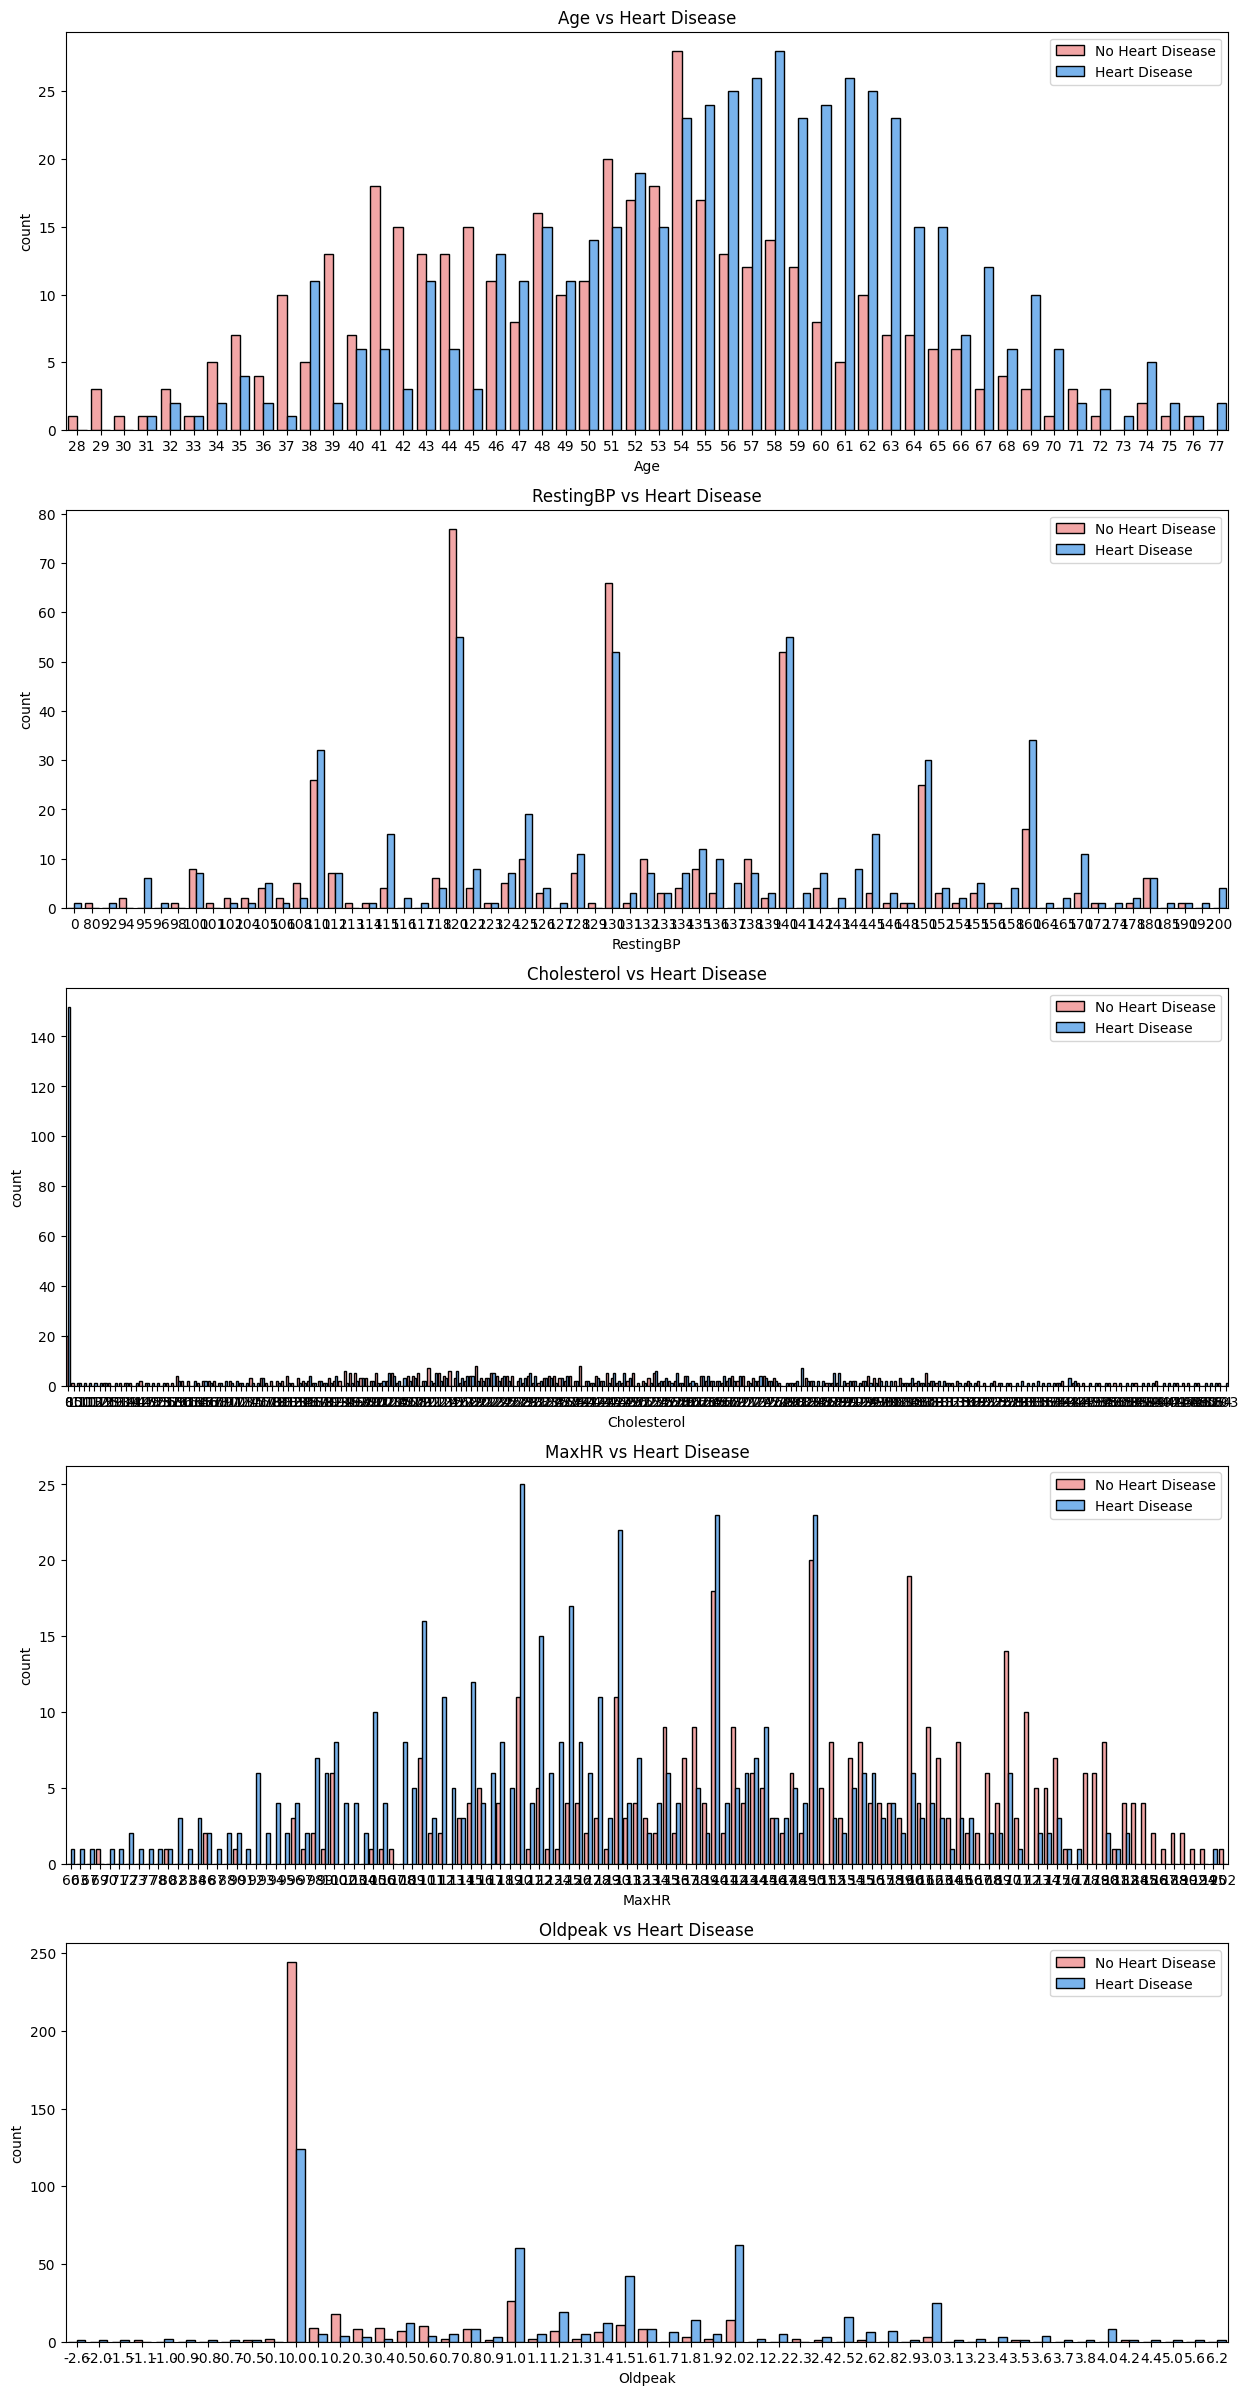

In [231]:
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize = (15,30))
for i in range(len(numerical_features)):
    plt.subplot(5,1,i+1)
    sns.countplot(data= df, x=numerical_features[i], hue = "HeartDisease", palette = colors, edgecolor = 'black')
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

- Because of too many unique data points in the above features, it is difficult to gain any type of insight. Thus, we will convert these numerical features,except age, into categorical features for understandable visualization and gaining insights purposes.
- Thus, we scale the individual values of these features. This brings the varied data points to a constant value that represents a range of values.
- Here, we divide the data points of the numerical features by 5 or 10 and assign its quotient value as the representative constant for that data point. The scaling constants of 5 & 10 are decided by looking into the data & intuition.

In [232]:
df['RestingBP_Group'] = [ int(i / 5) for i in df['RestingBP']]
df['Cholesterol_Group'] = [ int(i / 10) for i in df['Cholesterol']]
df['MaxHR_Group'] = [ int(i / 5) for i in df['MaxHR']]
df['Oldpeak_Group'] = [ int( (i*10) / 5) for i in df['Oldpeak']]

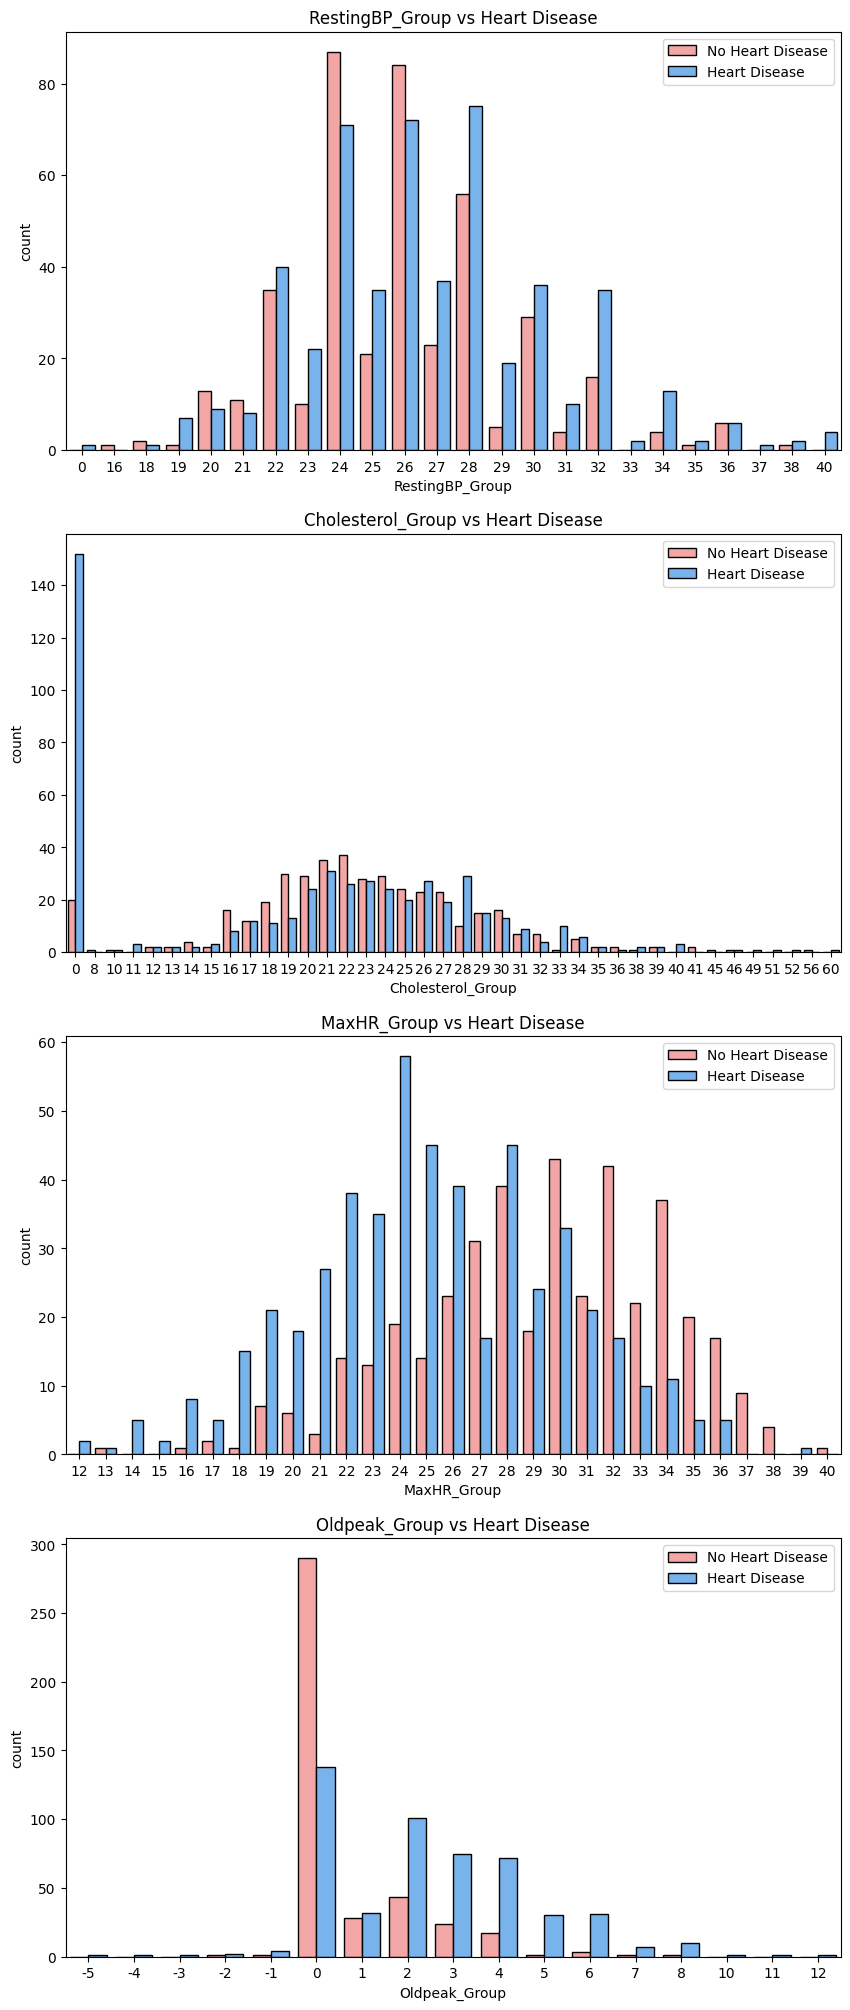

In [233]:
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (10,25))
group_numerical_features = [i + '_Group' for i in numerical_features[1:]]
for i in range(len(group_numerical_features)):
    plt.subplot(4,1,i+1)
    sns.countplot(data=df, x=group_numerical_features[i],hue = "HeartDisease",palette = colors, edgecolor = 'black')
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title)

- From the RestingBP group data, 95 (19x5) - 170 (34x5) readings are most prone to be detected with heart diseases.
- Cholesterol levels between 160 (16x10) - 340 (34x10) are highly susceptible to heart diseases.
- For the MaxHR readings, heart diseases are found throughout the data but 70 (14x5) - 180 (36x5) values has detected many cases.
- Oldpeak values also display heart diseases throughout. 0 (0x5/10) - 4 (8x5/10) slope values display high probability to be diagnosed with heart diseases.

- **Order / Values of features for positive cases of heart disease :**
- Categorical Features (Order) :

- Sex : Male > Female
- ChestPainType : ASY > NAP > ATA > TA
- FastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
- RestingECG : Normal > ST > LVH
- ExerciseAngina : Angina > No Angina
- ST_Slope : Flat > Up > Down

- **Numerical Features (Range) :**

- Age : 50+
- RestingBP : 95 - 170
- Cholesterol : 160 - 340
- MaxHR : 70 - 180
- Oldpeak : 0 - 4

<h4 style="background-color:white; color:red; padding:5px; text-align:center; font-weight:500;">Feature Engineering</h4>

In [234]:
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.43,1,1,0.41,0.83,0,1,1.38,0,0.30,2,0
1,-0.48,0,2,1.49,-0.17,0,1,0.75,0,0.41,1,1
2,-1.75,1,1,-0.13,0.77,0,2,-1.53,0,0.30,2,0
3,-0.58,0,0,0.30,0.14,0,1,-1.13,1,0.47,1,1
4,0.05,1,2,0.95,-0.03,0,1,-0.58,0,0.30,2,0


- *Normalization : Oldpeak feature is normalized as it had displayed a right skewed data distribution.*
- *Standardizarion : Age, RestingBP, Cholesterol and MaxHR features are scaled down because these features are normally distributed.*

- **Correlation Matrix**

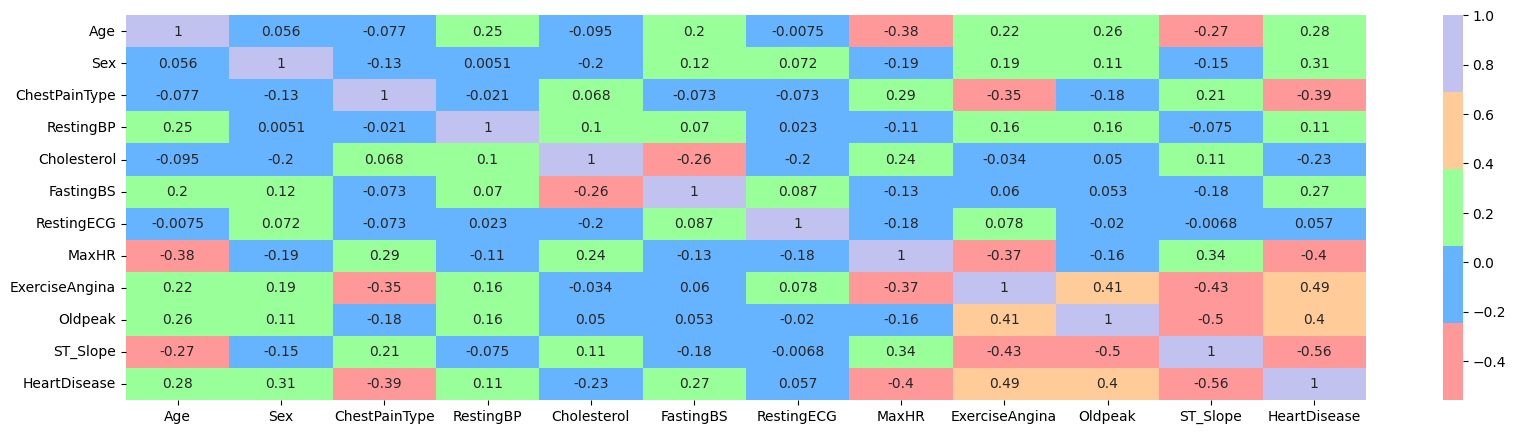

In [235]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = colors,annot = True);

- *Checking only with respect to HeartDisease column*

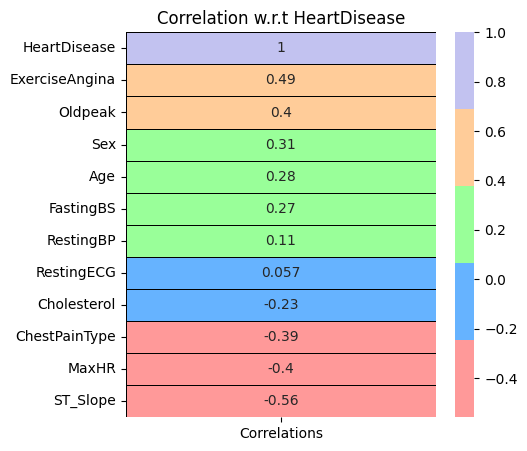

In [236]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

We can see that RestingBP and Resting ECG play a very negligible role in correlation with the HeartDisease column

<h4 style="background-color:white; color:red; padding:5px; text-align:center; font-weight:500;">Feature Selection for Categorical Features</h4><br>

- **Chi-Squared Test**

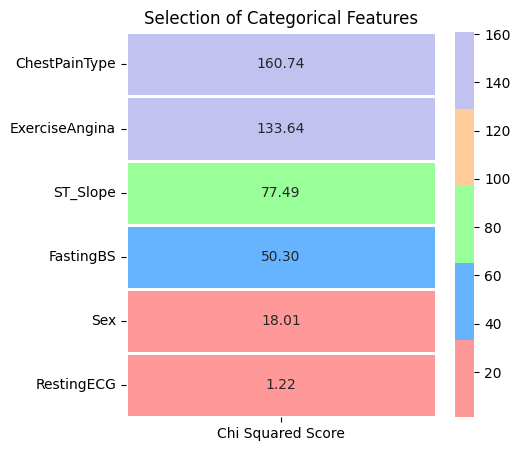

In [237]:
features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns), columns= ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors, linewidths=0.75, fmt = '.2f');
plt.title('Selection of Categorical Features');

In [238]:
features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 42)

In [239]:
def classify_model(classifier):
    classifier.fit(X_train,y_train)
    y_hat = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)
    print('Accuracy Score :','{0:.2%}'.format(accuracy_score(y_test,y_hat)))
    scores = cross_val_score(classifier,X_train,y_train,cv = cv,scoring = 'roc_auc')
    print('Cross Val Score :','{0:.2%}'.format(np.mean(scores)))
    print('Roc_Auc Score :','{0:.2%}'.format(roc_auc_score(y_test,y_hat)))
    svc_disp = RocCurveDisplay.from_estimator(classifier, X_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()


def model_evaluation(classifier):
    cm = confusion_matrix(y_test,classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(X_test)))


<h4 style="background-color:lightblue; color:purple; padding:5px; text-align:center; weight:800; font-weight:500">Modeling</h4><br>

In [240]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

<h4 style="background-color:lightblue; color:purple; padding:5px; text-align:center; font-weight:500;">Logistic Regression</h4><br>

In [241]:
lr = LogisticRegression(max_iter=1000)
params_grid_lr = {
    'C': np.linspace(-20, 20, 80), 
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear'],  
}
grid_search_lr = GridSearchCV(estimator=lr, param_grid=params_grid_lr, cv=5, scoring='recall') # Here recall is being used because we want to minimize the False Negatives
grid_search_lr.fit(X_train, y_train)
print('Best Parameters :',grid_search_lr.best_params_)
print('Best Score :','{0:.2%}'.format(grid_search_lr.best_score_))


Best Parameters : {'C': 6.329113924050635, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score : 88.29%


Accuracy Score : 84.24%
Cross Val Score : 91.22%
Roc_Auc Score : 84.81%


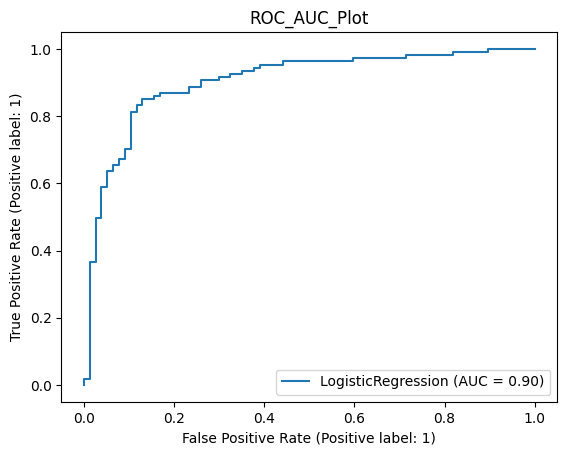

              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



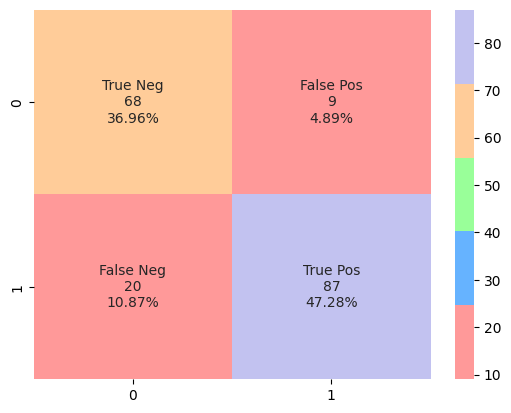

In [242]:
best_lr = grid_search_lr.best_estimator_
classify_model(best_lr)
model_evaluation(best_lr)

<h4 style="background-color:lightblue; color:red; padding:5px; text-align:center; font-weight:500;">SVM</h4><br>

In [243]:
svm = SVC(kernel = 'linear')
params_grid_svm = {
    'C': [0.01, 0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001], 
    'kernel': ['rbf']
}
grid_search_svm = GridSearchCV(estimator=svm, param_grid=params_grid_svm, refit = True, verbose = 2)
grid_search_svm.fit(X_train, y_train)
print('Best Parameters :',grid_search_svm.best_params_)
print('Best Score :','{0:.2%}'.format(grid_search_svm.best_score_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.01, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.01, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.01, gamma=0.0

Accuracy Score : 86.41%
Cross Val Score : 91.80%
Roc_Auc Score : 86.32%


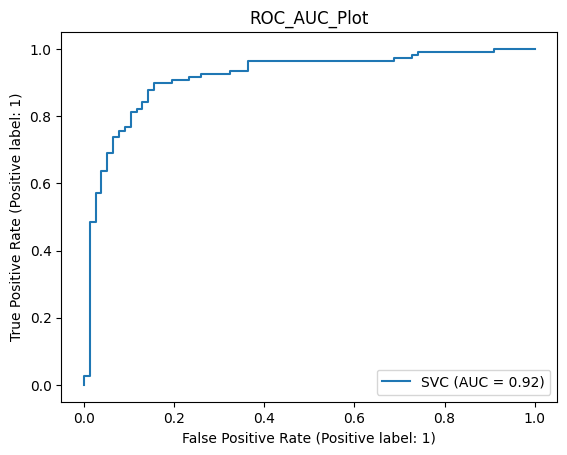

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



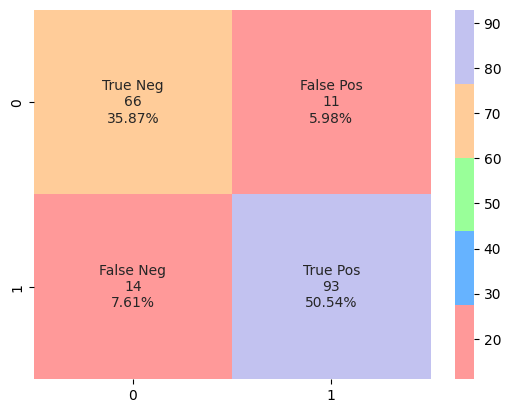

In [244]:
best_model_svm = grid_search_svm.best_estimator_
classify_model(best_model_svm)
model_evaluation(best_model_svm)


<h4 style="background-color:lightblue; color:darkgreen; padding:5px; text-align:center; font-weight:500;">Random Forest Classifier</h4><br>

In [245]:
from catboost import CatBoostClassifier

In [247]:
classifier_catboost = CatBoostClassifier()
params_grid_catboost = {
    'depth': [2, 5],
    'iterations': [150, 400],
    'learning_rate': [0.01, 0.2], 
}
grid_search_catboost = GridSearchCV(estimator=classifier_catboost, param_grid=params_grid_catboost, cv= 5, verbose = 2)
grid_search_catboost.fit(X_train, y_train)
print('Best Parameters :',grid_search_catboost.best_params_)
print('Best Score :','{0:.2%}'.format(grid_search_catboost.best_score_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
0:	learn: 0.6887642	total: 823us	remaining: 123ms
1:	learn: 0.6842603	total: 1.7ms	remaining: 126ms
2:	learn: 0.6806086	total: 2.08ms	remaining: 102ms
3:	learn: 0.6762548	total: 2.69ms	remaining: 98.2ms
4:	learn: 0.6724126	total: 3.19ms	remaining: 92.4ms
5:	learn: 0.6682047	total: 3.59ms	remaining: 86.1ms
6:	learn: 0.6640693	total: 4.26ms	remaining: 87ms
7:	learn: 0.6600116	total: 4.68ms	remaining: 83.2ms
8:	learn: 0.6564067	total: 5.05ms	remaining: 79.2ms
9:	learn: 0.6526290	total: 5.46ms	remaining: 76.5ms
10:	learn: 0.6489235	total: 5.81ms	remaining: 73.4ms
11:	learn: 0.6452819	total: 6.25ms	remaining: 71.9ms
12:	learn: 0.6415352	total: 6.6ms	remaining: 69.5ms
13:	learn: 0.6378551	total: 6.89ms	remaining: 67ms
14:	learn: 0.6346282	total: 7.24ms	remaining: 65.2ms
15:	learn: 0.6312188	total: 7.61ms	remaining: 63.8ms
16:	learn: 0.6279328	total: 8.1ms	remaining: 63.4ms
17:	learn: 0.6248489	total: 8.55ms	remaining: 62.7ms
18:	lea

0:	learn: 0.6854033	total: 1.42ms	remaining: 567ms
1:	learn: 0.6782132	total: 4.13ms	remaining: 821ms
2:	learn: 0.6696195	total: 5.99ms	remaining: 793ms
3:	learn: 0.6635954	total: 7.91ms	remaining: 783ms
4:	learn: 0.6553389	total: 10.2ms	remaining: 810ms
5:	learn: 0.6490579	total: 12.8ms	remaining: 843ms
6:	learn: 0.6412713	total: 15.5ms	remaining: 870ms
7:	learn: 0.6337767	total: 18.6ms	remaining: 912ms
8:	learn: 0.6265137	total: 22.5ms	remaining: 978ms
9:	learn: 0.6213310	total: 25.1ms	remaining: 977ms
10:	learn: 0.6147232	total: 27.7ms	remaining: 980ms
11:	learn: 0.6077467	total: 30.6ms	remaining: 991ms
12:	learn: 0.6018897	total: 33.4ms	remaining: 995ms
13:	learn: 0.5959903	total: 36.5ms	remaining: 1.01s
14:	learn: 0.5921639	total: 38.1ms	remaining: 979ms
15:	learn: 0.5862056	total: 39.7ms	remaining: 953ms
16:	learn: 0.5802120	total: 42.1ms	remaining: 948ms
17:	learn: 0.5734039	total: 44ms	remaining: 934ms
18:	learn: 0.5674428	total: 47ms	remaining: 943ms
19:	learn: 0.5616792	total

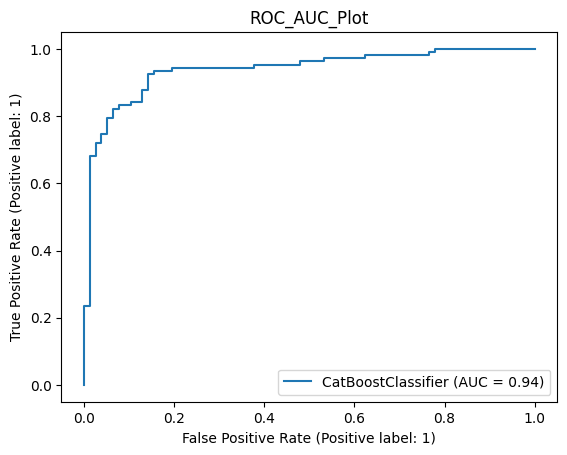

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



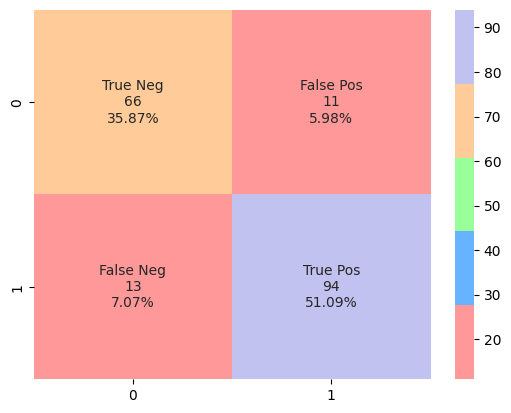

In [248]:
best_model_catboost = grid_search_catboost.best_estimator_
classify_model(best_model_catboost)
model_evaluation(best_model_catboost)

In [249]:
ensemble_model = VotingClassifier(estimators=[
    ('lr', best_lr),
    ('catboost', best_model_catboost),
    ('svm', best_model_svm)
], verbose=True, voting='hard')
ensemble_model.fit(X_train, y_train)

[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
0:	learn: 0.6854033	total: 1.75ms	remaining: 699ms
1:	learn: 0.6782132	total: 3.53ms	remaining: 703ms
2:	learn: 0.6696195	total: 5.48ms	remaining: 726ms
3:	learn: 0.6635954	total: 7.12ms	remaining: 705ms
4:	learn: 0.6553389	total: 9.16ms	remaining: 724ms
5:	learn: 0.6490579	total: 11.3ms	remaining: 740ms
6:	learn: 0.6412713	total: 13.1ms	remaining: 736ms
7:	learn: 0.6337767	total: 15.7ms	remaining: 771ms
8:	learn: 0.6265137	total: 17.7ms	remaining: 771ms
9:	learn: 0.6213310	total: 19.7ms	remaining: 769ms
10:	learn: 0.6147232	total: 21.6ms	remaining: 763ms
11:	learn: 0.6077467	total: 23.4ms	remaining: 757ms
12:	learn: 0.6018897	total: 25.2ms	remaining: 749ms
13:	learn: 0.5959903	total: 27.1ms	remaining: 748ms
14:	learn: 0.5921639	total: 28.6ms	remaining: 734ms
15:	learn: 0.5862056	total: 30.7ms	remaining: 736ms
16:	learn: 0.5802120	total: 32.4ms	remaining: 730ms
17:	learn: 0.5734039	total: 34.4ms	remaining: 730ms
18:

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=6.329113924050635,
                                                 max_iter=1000,
                                                 solver='liblinear')),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x000001E6BF01B350>),
                             ('svm', SVC(C=100, gamma=0.01))],
                 verbose=True)

In [250]:
y_pred_ensemble = ensemble_model.predict(X_test)

In [251]:
def classify_ensemble_model(classifier):
    classifier.fit(X_train,y_train)
    y_hat = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 42)
    print('Accuracy Score :','{0:.2%}'.format(accuracy_score(y_test,y_hat)))



[Voting] ....................... (1 of 3) Processing lr, total=   0.0s
0:	learn: 0.6854033	total: 2.2ms	remaining: 877ms
1:	learn: 0.6782132	total: 4.29ms	remaining: 854ms
2:	learn: 0.6696195	total: 5.85ms	remaining: 774ms
3:	learn: 0.6635954	total: 8.74ms	remaining: 865ms
4:	learn: 0.6553389	total: 10.3ms	remaining: 816ms
5:	learn: 0.6490579	total: 12.2ms	remaining: 803ms
6:	learn: 0.6412713	total: 14ms	remaining: 786ms
7:	learn: 0.6337767	total: 15.6ms	remaining: 763ms
8:	learn: 0.6265137	total: 17.1ms	remaining: 744ms
9:	learn: 0.6213310	total: 18.5ms	remaining: 722ms
10:	learn: 0.6147232	total: 20.2ms	remaining: 715ms
11:	learn: 0.6077467	total: 22.2ms	remaining: 717ms
12:	learn: 0.6018897	total: 24.1ms	remaining: 719ms
13:	learn: 0.5959903	total: 26.3ms	remaining: 725ms
14:	learn: 0.5921639	total: 27.3ms	remaining: 700ms
15:	learn: 0.5862056	total: 28.7ms	remaining: 689ms
16:	learn: 0.5802120	total: 30.2ms	remaining: 680ms
17:	learn: 0.5734039	total: 31.5ms	remaining: 669ms
18:	le

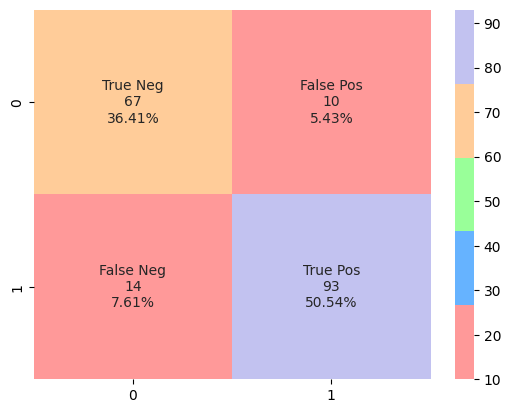

In [252]:
classify_ensemble_model(ensemble_model)
model_evaluation(ensemble_model)

<h4 style="background-color:white; color:red; padding:5px; text-align:center; font-weight:500;">Comparing the models made</h4><br>

In [253]:
model_name = ['Logistic Regression', 'Catboost','SVM','Ensemble Model']
models_lst = [best_lr, best_model_catboost, best_model_svm,ensemble_model]

In [254]:
def compare_models(models):
    for i in range(len(models)):
        print(f"Classification report of {model_name[i]}:\n",classification_report(y_test, models[i].predict(X_test)))
        accuracy = accuracy_score(y_test, models[i].predict(X_test))
        precision = precision_score(y_test, models[i].predict(X_test))
        print(f"Accuracy of {model_name[i]}:", accuracy)
        print(f"Precision of {model_name[i]}:", precision)

In [255]:
compare_models(models_lst)

Classification report of Logistic Regression:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

Accuracy of Logistic Regression: 0.842391304347826
Precision of Logistic Regression: 0.90625
Classification report of Catboost:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184

Accuracy of Catboost: 0.8695652173913043
Precision of Catboost: 0.8952380952380953
Classification report of SVM:
               precision    recall  f1-score   support

 

In [256]:
new_directory_path = "model_files/"

if not os.path.exists(new_directory_path):
    os.makedirs(new_directory_path)

rf_pkl_path = os.path.join(new_directory_path, 'catboost_model.joblib')
lr_pkl_path = os.path.join(new_directory_path, 'lr_model.joblib')
svm_pkl_path = os.path.join(new_directory_path, 'svm_model.joblib')
ensemble_pkl_path = os.path.join(new_directory_path, 'ensemble_model.joblib')
mms_pkl_path = os.path.join(new_directory_path, 'mms.joblib')
ss_pkl_path = os.path.join(new_directory_path, 'ss.joblib')
pkl_lst = [rf_pkl_path, lr_pkl_path, svm_pkl_path, ensemble_pkl_path,mms_pkl_path,ss_pkl_path]

In [257]:
for i in range(len(pkl_lst)):
    if not os.path.exists(pkl_lst[i]):
        with open(pkl_lst[i], 'wb') as file:
            if i == 0:
                joblib.dump(best_model_catboost, file)
            elif i == 1:
                joblib.dump(best_lr, file)
            elif i == 2:
                joblib.dump(best_model_svm, file)
            elif i == 3:
                joblib.dump(ensemble_model, file)
            elif i == 4:
                joblib.dump(mms, file)
            else:
                joblib.dump(ss, file)